In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the dataset from the file Ecommerce.csv

```
This dataset includes the following data for 200 online customers:

- Email
- Adress
- Avatar
- Avg Session Length (everage time they spent on usage)
- Time on App (time they spent using the application)
- Time on Website (time they spent using the website)
- Length of Membership (for how long they have been a user)
- Yearly Amount Spent (how much money they spend yearly)

Yout goal will be to estimate the value of the Yearly Amount Spent using the feature(s) of the users
```

### Get rid of non-numerical columns of the dataset

In [ ]:
df = pd.read_csv('Ecommerce.csv')
df.head()

In [4]:
df = df.drop(['Email','Address','Avatar'], axis=1)

### Use Yearly Amount Spent as your target variable. Plot the relationship of each of the numerical features with the target variable

Text(288.61590909090904, 0.5, 'Yearly Amount Spent')

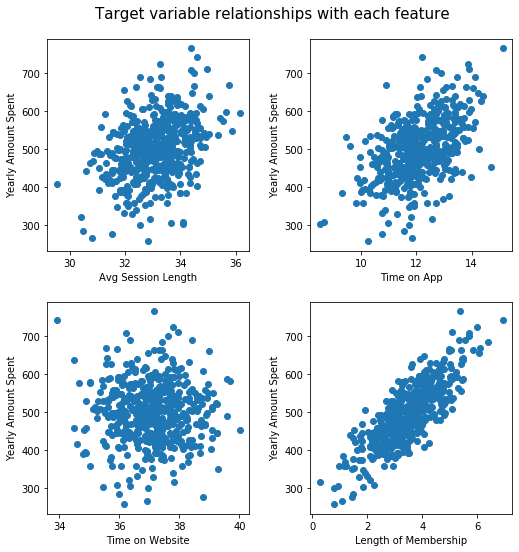

In [5]:
y = df['Yearly Amount Spent']
X = df.loc[:, df.columns != 'Yearly Amount Spent']
fig, axs = plt.subplots(2, 2)
fig.set_figwidth(8)
fig.set_figheight(8)
fig.tight_layout(h_pad = 3, w_pad = 3, pad = 4)

fig.suptitle('Target variable relationships with each feature',  fontsize=15)

axs[0,0].scatter(X['Avg Session Length'], y)
axs[0,0].set_xlabel('Avg Session Length')
axs[0,0].set_ylabel('Yearly Amount Spent')

axs[0,1].scatter(X['Time on App'], y)
axs[0,1].set_xlabel('Time on App')
axs[0,1].set_ylabel('Yearly Amount Spent')

axs[1,0].scatter(X['Time on Website'], y)
axs[1,0].set_xlabel('Time on Website')
axs[1,0].set_ylabel('Yearly Amount Spent')

axs[1,1].scatter(X['Length of Membership'], y)
axs[1,1].set_xlabel('Length of Membership')
axs[1,1].set_ylabel('Yearly Amount Spent')

### Leave only one feature that has a linear relationship with the target variable.

In [7]:
X= X['Length of Membership']

### Divide the dataset into training and test sets with the ratio 80:20.

In [8]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, y_Train, y_Test = train_test_split(X,y, test_size=0.2, random_state=42)

### Use the resulting train and test sets with the next 2 functions to fit linear regression and plot the resulting regression line.

The first function is `fit_1d_linear_regression` that takes two vectors $x$ and $y$, and returns a numpy array ($\beta_0, \beta_1)$, where $\beta_0$ is the intercept of the line, and $\beta_1$ is the slope. 

In [9]:
def fit_1d_linear_regression(data_vector, response_vector):
    Xi = data_vector
    yi = response_vector
    n=len(data_vector)
    cov = (Xi*yi).sum()-(yi.sum())*(Xi.sum())/n
    var = (Xi**2).sum() - (Xi.sum()**2)/n
    b1 = cov/var
    b0 = (yi.sum()-b1*Xi.sum())/n
    return (b0, b1)

In [17]:
b0,b1 = fit_1d_linear_regression(X_Train, y_Train)
print("Inercept: " + str(b0) + "\n" + "Slope: " + str(b1))

Inercept: 271.35211280339314
Slope: 64.6401006538671


The second function is `plot_line` function, that takes $\beta_0, \beta_1, x, y$ and plots a scatter plot of the data, and the line $y = \beta_0 + \beta_1 x$. And saves the plot in `YOURNAME.png`

In [16]:
def plot_fitted_line(b0: float,
                     b1: float,
                     x,
                     y,
                     username: str
                    ):
    
    plt.scatter(x, y,  color='black')
    plt.plot(x, b0+b1*x, color='blue', linewidth=3)

    plt.xlabel('Length of Membership')
    plt.ylabel('Yearly Amount Spent')
    plt.title('Regression line Length of Membership vs Yearly Amount Spent')
    plt.xticks(())
    plt.yticks(())
    plt.savefig(username + '.png')
    pass

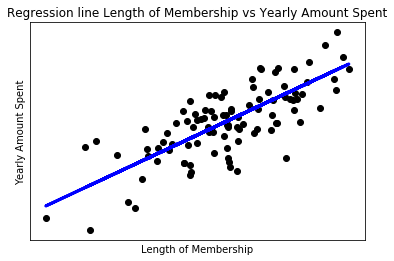

In [19]:
plot_fitted_line(b0,b1, X_Test, y_Test, 'Diana')

### Plot example

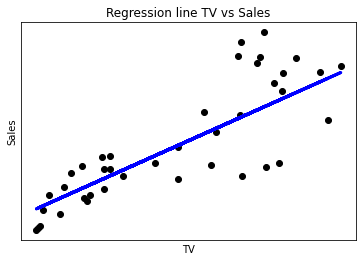

### Now fit the linear regression to the data containing only 1 feature using sklearn and compare the results with your own fit_1d_linear_regression function

In [67]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_Train.values.reshape(-1,1), y_Train)
y_pred_sk = regr.predict(X_Test.values.reshape(-1,1))
print("Inercept: " + str(regr.intercept_) + "\n" + "Slope: " + str( regr.coef_[0]))

Inercept: 271.3521128033932
Slope: 64.64010065386708


The results of two implimentations are the same

### Use sklearn.metrics to calculate Mean absolute error, Mean squared error, Root mean squared error and R-squared for the results of your own function vs the sklearn regression results. Try to interprete your results.

In [48]:
y_pred = b0 + b1*X_Test
print('Sklearn Regression Results\n')
print('Mean absolute error: %.2f' % mean_absolute_error(y_Test, y_pred))
print('Mean squared error: %.2f' % mean_squared_error(y_Test, y_pred))
print('Root mean squared error: %.2f' % np.sqrt(mean_squared_error(y_Test, y_pred)))
print('R-squared: %.2f' % r2_score(y_Test, y_pred))

Sklearn Regression Results

Mean absolute error: 37.84
Mean squared error: 2162.11
Root mean squared error: 46.50
R-squared: 0.56


In [68]:
print('Result of defined function\n')
print('Mean absolute error: %.2f' % mean_absolute_error(y_Test, y_pred_sk))
print('Mean squared error: %.2f' % mean_squared_error(y_Test, y_pred_sk))
print('Root mean squared error: %.2f' % np.sqrt(mean_squared_error(y_Test, y_pred_sk)))
print('R-squared: %.2f' % r2_score(y_Test, y_pred_sk))

Result of defined function

Mean absolute error: 37.84
Mean squared error: 2162.11
Root mean squared error: 46.50
R-squared: 0.56


We got the same results for both: by hand implemented function and for the one with sickit learn. The $R^2$ is equal to 0.56, which is not a good indicator. It shows that when using only 'Length of Membership' feature, the model could explain only 56% of the data variance.

### Fit linear regression to the data containing all numerical features using sklearn and use the same metrics to evaluate how good the model is.

In [29]:
y = df[['Yearly Amount Spent']]
X = df.loc[:, df.columns != 'Yearly Amount Spent']

XTrain, XTest, yTrain, yTest = train_test_split(X,y, test_size=0.2, random_state=42)

regr = linear_model.LinearRegression()
regr.fit(XTrain, yTrain)
ypred = regr.predict(XTest)

print('Sklearn Regression Results\n')
print('Mean absolute error: %.2f' % mean_absolute_error(yTest, ypred))
print('Mean squared error: %.2f' % mean_squared_error(yTest, ypred))
print('Root mean squared error: %.2f' % np.sqrt(mean_squared_error(yTest, ypred)))
print('R-squared: %.2f' % r2_score(yTest, ypred))

Sklearn Regression Results

Mean absolute error: 8.56
Mean squared error: 109.86
Root mean squared error: 10.48
R-squared: 0.98


We can notice that we have much lower MAE, MSE and RMSE results for regression using all numeric features.
In this case we also have higher %R^2% result. So, this time the model could explain 98% of the total data variance.

### Implement K-fold Cross Validation

In [45]:
import random
def k_fold(data, k):
    split = list()
    k_data = list(data)
    fold_size = int(len(data) / k)
    random.seed(42)
    for i in range(k):
        fold = list()
        while len(fold) < fold_size:
            index = random.randrange(len(k_data))
            fold.append(k_data.pop(index))
        split.append(fold)
    return split

### Evaluate model with K-fold

In [46]:
X = df.loc[:, df.columns != 'Yearly Amount Spent']
y = df['Yearly Amount Spent']
X = k_fold(X.values,5)
y=k_fold(y.values,5)
scores = []
for i in range(len(X)):
    X_test = X[i]
    y_test = y[i]
    y_train = y[i+1:] + y[:i]
    X_train = X[i+1:] + X[:i]
    
    X_train_final = []
    y_train_final = []
    for i in X_train:
        X_train_final+=i

    for i in y_train:
        y_train_final+=i

    X_train_final = np.array(X_train_final)
    y_train_final = np.array(y_train_final)
    
    regr = linear_model.LinearRegression()
    regr.fit(X_train_final, y_train_final)
    y_pred = regr.predict(X_test)
    scores.append(r2_score(y_pred, y_test))

In [47]:
np.mean(scores)

0.983119365174904